In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',sep=',', header=None, index_col=None)

In [3]:
df.columns=['age','workclass','fnlwgt','education','marital-status','occupation','inspct','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']

In [4]:
df1 =pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',skiprows = 1, 
                      header = None)

In [5]:
df1.columns = ['age','workclass','fnlwgt','education','marital-status','occupation','inspct','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']

In [6]:
train=df
test=df1

In [7]:
train.head()

,age,workclass,fnlwgt,education,marital-status,occupation,inspct,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
test.head()

,age,workclass,fnlwgt,education,marital-status,occupation,inspct,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


### Data Analysis 

In [9]:
#see the info of the data
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
marital-status    32561 non-null int64
occupation        32561 non-null object
inspct            32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null int64
workclass         16281 non-null object
fnlwgt            16281 non-null int64
education         16

(None, None)

In [10]:
#find which columns need to be converted to numerical information
for col in df.columns:
    if train[col].dtype == object:
        print(col)
        print(set(train[col]))

workclass
{' Never-worked', ' Self-emp-inc', ' Local-gov', ' Self-emp-not-inc', ' Federal-gov', ' Without-pay', ' Private', ' ?', ' State-gov'}
education
{' Bachelors', ' Masters', ' 9th', ' Some-college', ' 1st-4th', ' Preschool', ' Assoc-acdm', ' 10th', ' Doctorate', ' Prof-school', ' 7th-8th', ' Assoc-voc', ' HS-grad', ' 11th', ' 12th', ' 5th-6th'}
occupation
{' Divorced', ' Married-AF-spouse', ' Married-spouse-absent', ' Separated', ' Married-civ-spouse', ' Widowed', ' Never-married'}
inspct
{' Armed-Forces', ' Other-service', ' Prof-specialty', ' Tech-support', ' Exec-managerial', ' Handlers-cleaners', ' Machine-op-inspct', ' ?', ' Sales', ' Adm-clerical', ' Protective-serv', ' Priv-house-serv', ' Farming-fishing', ' Transport-moving', ' Craft-repair'}
relationship
{' Unmarried', ' Other-relative', ' Wife', ' Not-in-family', ' Husband', ' Own-child'}
race
{' Amer-Indian-Eskimo', ' Black', ' Other', ' Asian-Pac-Islander', ' White'}
sex
{' Male', ' Female'}
native-country
{' Greece'

In [11]:
#find which columns need to be converted to numerical information
for col in df1.columns:
    if test[col].dtype == object:
        print(col)
        print(set(test[col]))

workclass
{' Never-worked', ' Self-emp-inc', ' Local-gov', ' Federal-gov', ' Self-emp-not-inc', ' Without-pay', ' Private', ' ?', ' State-gov'}
education
{' Bachelors', ' Masters', ' Some-college', ' 9th', ' 1st-4th', ' Preschool', ' 10th', ' Assoc-acdm', ' Prof-school', ' Doctorate', ' 7th-8th', ' Assoc-voc', ' HS-grad', ' 11th', ' 12th', ' 5th-6th'}
occupation
{' Divorced', ' Married-AF-spouse', ' Married-spouse-absent', ' Separated', ' Married-civ-spouse', ' Widowed', ' Never-married'}
inspct
{' Armed-Forces', ' Other-service', ' Prof-specialty', ' Tech-support', ' Protective-serv', ' Machine-op-inspct', ' Exec-managerial', ' ?', ' Sales', ' Adm-clerical', ' Priv-house-serv', ' Handlers-cleaners', ' Farming-fishing', ' Transport-moving', ' Craft-repair'}
relationship
{' Unmarried', ' Other-relative', ' Wife', ' Not-in-family', ' Husband', ' Own-child'}
race
{' Amer-Indian-Eskimo', ' Black', ' Other', ' Asian-Pac-Islander', ' White'}
sex
{' Male', ' Female'}
native-country
{' Greece'

In [12]:
#find any null values
t1=train.isnull().sum()
t2=test.isnull().sum()
print(t1,t2)

age               0
workclass         0
fnlwgt            0
education         0
marital-status    0
occupation        0
inspct            0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64 age               0
workclass         0
fnlwgt            0
education         0
marital-status    0
occupation        0
inspct            0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [13]:
#convert "?" to null values and then drop them
for col in train.columns:
    if train[col].dtype == object:
        print(col, (train[col].str.contains(' \?') == True).sum())

workclass 1836
education 0
occupation 0
inspct 1843
relationship 0
race 0
sex 0
native-country 583
income 0


In [14]:
for col in test.columns:
    if test[col].dtype == object:
        print(col, (test[col].str.contains(' \?') == True).sum())

workclass 963
education 0
occupation 0
inspct 966
relationship 0
race 0
sex 0
native-country 274
income 0


In [15]:
train = train.replace(' ?', np.nan).dropna()
test = test.replace(' ?', np.nan).dropna()

In [16]:
for col in train.columns:
    if train[col].dtype == object:
        print(col, (train[col].str.contains(' \?') == True).sum())

workclass 0
education 0
occupation 0
inspct 0
relationship 0
race 0
sex 0
native-country 0
income 0


In [17]:
for col in test.columns:
    if test[col].dtype == object:
        print(col, (test[col].str.contains(' \?') == True).sum())

workclass 0
education 0
occupation 0
inspct 0
relationship 0
race 0
sex 0
native-country 0
income 0


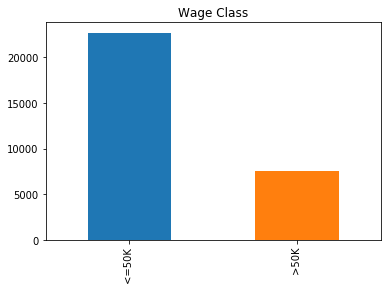

In [18]:
# Count of wage classes: >50K & <=50K
train['income'].value_counts().plot(kind="bar")
plt.title('Wage Class')
plt.show()

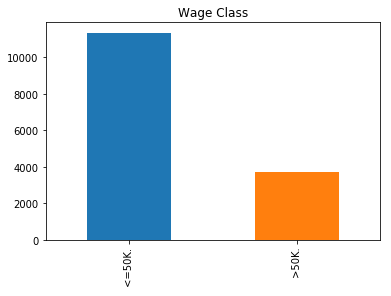

In [19]:
test['income'].value_counts().plot(kind="bar")
plt.title('Wage Class')
plt.show()

Since XGBoost only takes numerical data we need to change the categorical data to numerical data. <=50k will represented by 0, and >50k will be represented by 1.

In [20]:
train['income'] = train['income'].replace({'<=50K': 0, '>50K':1}, regex=True)

test['income'] = test['income'].replace({'<=50K': 0, '>50K':1}, regex=True)

In [21]:
train.head()

,age,workclass,fnlwgt,education,marital-status,occupation,inspct,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [22]:
test.head()

,age,workclass,fnlwgt,education,marital-status,occupation,inspct,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


In [23]:
#Categorical features for training set
cat_columns=[]
for col in train.columns:
    if train[col].dtype == object:
        cat_columns.append(col)
print(cat_columns)

['workclass', 'education', 'occupation', 'inspct', 'relationship', 'race', 'sex', 'native-country']


In [24]:
#Categorical Features for test set
cat_columns=[]
for col in test.columns:
    if test[col].dtype == object:
        cat_columns.append(col)
print(cat_columns)

['workclass', 'education', 'occupation', 'inspct', 'relationship', 'race', 'sex', 'native-country']


In [25]:
train.describe()

,age,fnlwgt,marital-status,capital-gain,capital-loss,hours-per-week,income
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238,0.248922
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984,0.432396
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [26]:
#changing categorical variables into numerical values by encoding them
from sklearn.preprocessing import LabelEncoder
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

In [27]:
train, _ =number_encode_features(train)

In [28]:
train.head()

,age,workclass,fnlwgt,education,marital-status,occupation,inspct,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [29]:
test, _ = number_encode_features(test)

In [30]:
test.head()

,age,workclass,fnlwgt,education,marital-status,occupation,inspct,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,37,1
5,34,2,198693,0,6,4,7,1,4,1,0,0,30,37,0


In [31]:
#split data train/test
X_train = train.drop('income', axis =1)
y_train = train['income']
X_test = test.drop('income', axis =1)
y_test = test['income']

features=X_train.columns

## Logistic Regression

In [32]:
model = LogisticRegression()
model = model.fit(X_train, y_train)

In [33]:
logistic_score=model.score(X_train, y_train)

In [34]:
y_pred = model.predict(X_test)

In [35]:
print(y_pred)

[0 0 0 ... 0 1 0]


In [36]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10696   664]
 [ 2577  1123]]


In [37]:
#score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print("Classification Report:\n ",classification_report(y_test, y_pred))
score=accuracy_score(y_test,y_pred)
score=score*100
print("Score is",score, '%')

Classification Report:
               precision    recall  f1-score   support

          0       0.81      0.94      0.87     11360
          1       0.63      0.30      0.41      3700

avg / total       0.76      0.78      0.76     15060

Score is 78.47941567065074 %


### Using Multiple Categorical Algorithms to predict wage class of individuals. 

In [38]:
#feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
classification_algorithms=["Decision Tree", "Random Forest", "XGBoost"]

In [40]:
ca = pd.DataFrame(np.arange(len(classification_algorithms)).reshape(1, len(classification_algorithms)), columns=classification_algorithms,
                  index=['Test Accuracy'])
dex=['Test Accuracy']
for algorithm in classification_algorithms:
    
    if algorithm == "Decison Tree":
        classifier = DecisionTreeClassifier(criterion='entropy')
        classifier.fit(X_train,y_train)
        y_predict = classifier.predict(X_test)
        
    if algorithm == "Random Forest":
        classifier = RandomForestClassifier(n_estimators = 5, random_state =0)
        classifier.fit(X_train,y_train)
        y_predict = classifier.predict(X_test)
        
    
    if algorithm == "XGBoost":
        import xgboost
        classifier = xgboost.XGBClassifier()
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
    
    print("\n Classification Algorithm Name is: ",algorithm)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    
    print("\n Classification Report:\n ",classification_report(y_test, y_pred))
    score=accuracy_score(y_test,y_pred)

    print("Score is:",score*100)
    ca.loc[:,algorithm] =score
    
#highlight_max=dfi.max()    
print("\n",ca)




 Classification Algorithm Name is:  Decision Tree
[[10696   664]
 [ 2577  1123]]

 Classification Report:
               precision    recall  f1-score   support

          0       0.81      0.94      0.87     11360
          1       0.63      0.30      0.41      3700

avg / total       0.76      0.78      0.76     15060

Score is: 78.47941567065074

 Classification Algorithm Name is:  Random Forest
[[10696   664]
 [ 2577  1123]]

 Classification Report:
               precision    recall  f1-score   support

          0       0.81      0.94      0.87     11360
          1       0.63      0.30      0.41      3700

avg / total       0.76      0.78      0.76     15060

Score is: 78.47941567065074

 Classification Algorithm Name is:  XGBoost
[[10785   575]
 [ 1510  2190]]

 Classification Report:
               precision    recall  f1-score   support

          0       0.88      0.95      0.91     11360
          1       0.79      0.59      0.68      3700

avg / total       0.86      0.86

C:\Users\Arron con Pollo\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [41]:
ca["Logistic Regression"]=logistic_score

In [42]:
print(ca)

               Decision Tree  Random Forest   XGBoost  Logistic Regression
Test Accuracy       0.784794       0.784794  0.861554             0.786785


In [43]:
# Get to know the feature importances
classifier = RandomForestClassifier(n_estimators = 40,random_state=0)
classifier.fit(X_train, y_train)
#print(classifier.feature_importances_)
# Get numerical feature importances
importances = list(classifier.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features, importances)]
feature_importances

[('age', 0.15),
 ('workclass', 0.04),
 ('fnlwgt', 0.17),
 ('education', 0.03),
 ('marital-status', 0.09),
 ('occupation', 0.07),
 ('inspct', 0.07),
 ('relationship', 0.1),
 ('race', 0.01),
 ('sex', 0.01),
 ('capital-gain', 0.12),
 ('capital-loss', 0.04),
 ('hours-per-week', 0.08),
 ('native-country', 0.02)]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

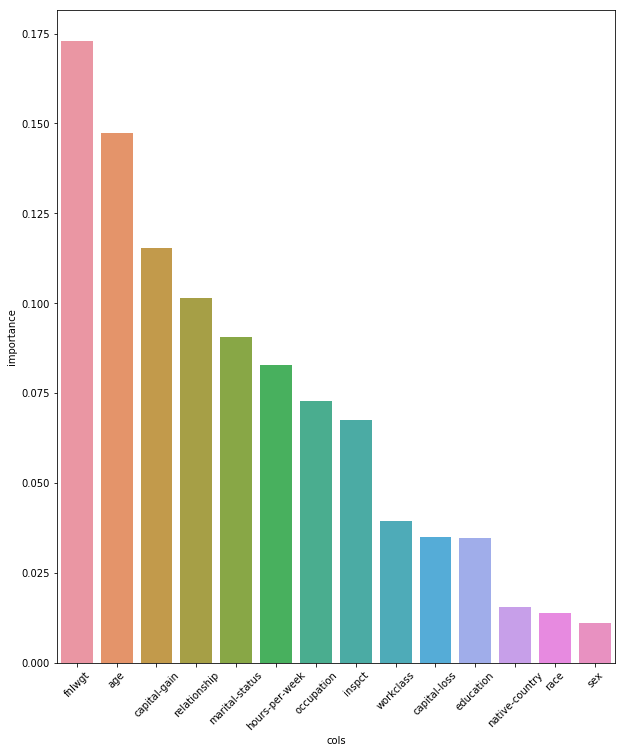

In [44]:
importance = pd.DataFrame.from_dict({'cols':features, 'importance':classifier.feature_importances_})
importance = importance.sort_values(by='importance', ascending=False)
plt.figure(figsize=(10,12))
sns.barplot(importance.cols, importance.importance)
plt.xticks(rotation=45)

In [45]:
imp_cols = importance[importance.importance >= 0.05].cols.values
imp_cols

array(['fnlwgt', 'age', 'capital-gain', 'relationship', 'marital-status',
       'hours-per-week', 'occupation', 'inspct'], dtype=object)

In [46]:
df2=train[imp_cols]

In [47]:
df2.head()

,fnlwgt,age,capital-gain,relationship,marital-status,hours-per-week,occupation,inspct
0,77516,39,2174,1,13,40,4,0
1,83311,50,0,0,13,13,2,3
2,215646,38,0,1,9,40,0,5
3,234721,53,0,0,7,40,2,5
4,338409,28,0,5,13,40,2,9


In [48]:
df3=test[imp_cols]

In [49]:
df3.head()

,fnlwgt,age,capital-gain,relationship,marital-status,hours-per-week,occupation,inspct
0,226802,25,0,3,7,40,4,6
1,89814,38,0,0,9,50,2,4
2,336951,28,0,0,12,40,2,10
3,160323,44,7688,0,10,40,2,6
5,198693,34,0,1,6,30,4,7


In [50]:
#split data train/test
X_train = df2
y_train = train['income']
X_test = df3
y_test = test['income']

features=X_train.columns

In [51]:
classification_algorithms=["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost"]

In [52]:
ca = pd.DataFrame(np.arange(len(classification_algorithms)).reshape(1, len(classification_algorithms)), columns=classification_algorithms,
                  index=['Test Accuracy'])
dex=['Test Accuracy']
for algorithm in classification_algorithms:
    
    if algorithm == "Logistic Regression":
        classifier = LogisticRegression()
        classifier.fit(X_train, y_train)
        y_predict = classifier.predict(X_test)
        
    if algorithm == "Decison Tree":
        classifier = DecisionTreeClassifier(criterion='entropy')
        classifier.fit(X_train,y_train)
        y_predict = classifier.predict(X_test)
        
    if algorithm == "Random Forest":
        classifier = RandomForestClassifier(n_estimators = 5, random_state =0)
        classifier.fit(X_train,y_train)
        y_predict = classifier.predict(X_test)
        
    
    if algorithm == "XGBoost":
        import xgboost
        classifier = xgboost.XGBClassifier()
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
    
    print("\n Classification Algorithm Name is: ",algorithm)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    
    print("\n Classification Report:\n ",classification_report(y_test, y_pred))
    score=accuracy_score(y_test,y_pred)

    print("Score is:",score*100)
    ca.loc[:,algorithm] =score
    
    
print("\n",ca)




 Classification Algorithm Name is:  Logistic Regression
[[10785   575]
 [ 1510  2190]]

 Classification Report:
               precision    recall  f1-score   support

          0       0.88      0.95      0.91     11360
          1       0.79      0.59      0.68      3700

avg / total       0.86      0.86      0.85     15060

Score is: 86.15537848605578

 Classification Algorithm Name is:  Decision Tree
[[10785   575]
 [ 1510  2190]]

 Classification Report:
               precision    recall  f1-score   support

          0       0.88      0.95      0.91     11360
          1       0.79      0.59      0.68      3700

avg / total       0.86      0.86      0.85     15060

Score is: 86.15537848605578

 Classification Algorithm Name is:  Random Forest
[[10785   575]
 [ 1510  2190]]

 Classification Report:
               precision    recall  f1-score   support

          0       0.88      0.95      0.91     11360
          1       0.79      0.59      0.68      3700

avg / total       0.

C:\Users\Arron con Pollo\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
